In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
from utils.utils import load, save

In [194]:
config = {
    "General" : {
        "Name" : "Double descent on CIFAR-10",
        "Sub Name" : "Cat vs Dog 10*10 resolution",
    }
}

In [195]:
experiment_path = r'results/' +  config['General']['Name']
data_path = experiment_path + '/' + config['General']['Sub Name'] + ".json"

In [196]:
with open(data_path, 'r') as file:
    width_to_results = json.load(file)

In [197]:
def unpack_results(width_to_results):
    x_loss_train = []
    x_loss_test = []
    x_complexity = []
    x_alpha = []
    x_parameter_count = []
    x_width = np.sort(np.array(list(width_to_results.keys()), dtype=int))
    
    for width in x_width:
        results = width_to_results[str(width)]
        x_loss_train.append(np.mean(results["loss train"]))
        x_loss_test.append(np.median(results["loss test"]))
        x_complexity.append(np.median(np.array(results["complexity"])[:,0]))

    return x_loss_train, x_loss_test, x_complexity, x_width

In [198]:
x_loss_train, x_loss_test, x_complexity, x_width = unpack_results(width_to_results)

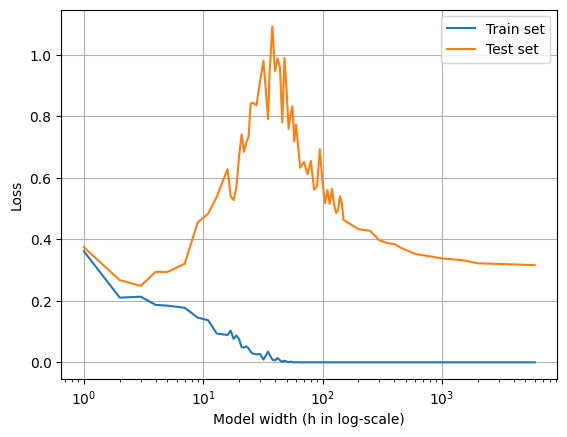

In [199]:
plt.plot(x_width[:len(x_complexity)], np.array(x_loss_train), label="Train set")
plt.plot(x_width[:len(x_complexity)], np.array(x_loss_test), label="Test set")
plt.xscale('log')
plt.xlabel("Model width (h in log-scale)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

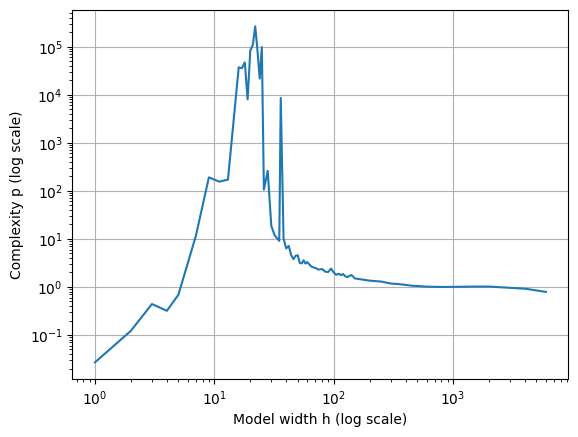

In [202]:
#plt.figure(figsize=(9, 5))
plt.plot(x_width[:len(x_complexity)], x_complexity)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Model width h (log scale)")
plt.ylabel("Complexity p (log scale)")
plt.grid(True)

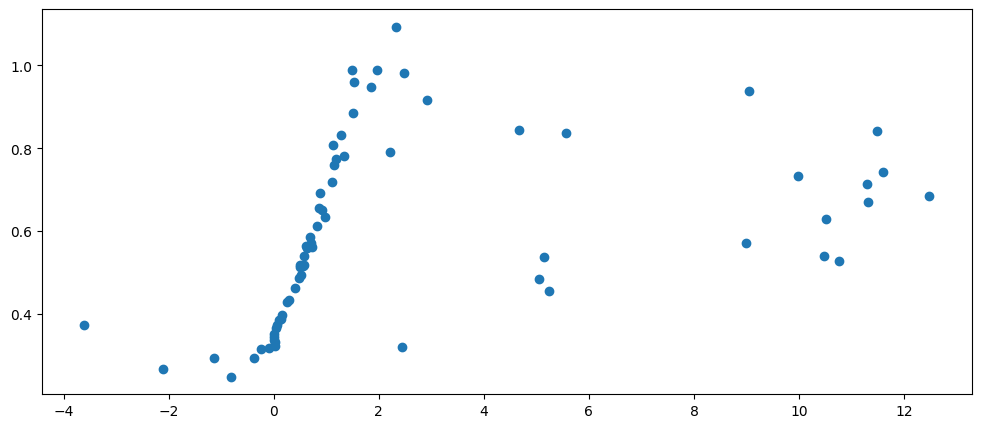

In [165]:
plt.figure(figsize=(12, 5))
plt.scatter(np.log(x_complexity[:]), x_loss_test[:])
#plt.xlim((-5, 7))

## Alpha

In [176]:
config = {
    "General" : {
        "Name" : "Double descent on CIFAR-10",
        "Sub Name" : "Cat vs Dog alpha monitoring",
    }
}

In [177]:
experiment_path = r'results/' +  config['General']['Name']
data_path = experiment_path + '/' + config['General']['Sub Name'] + ".json"

In [178]:
with open(data_path, 'r') as file:
    width_to_results = json.load(file)

In [179]:
def unpack_results(width_to_results):
    x_loss_train = []
    x_loss_test = []
    x_complexity = []
    x_alpha = []
    x_parameter_count = []
    x_width = np.sort(np.array(list(width_to_results.keys()), dtype=int))
    
    for width in x_width:
        results = width_to_results[str(width)]
        x_loss_train.append(np.mean(results["loss train"]))
        x_loss_test.append(np.mean(results["loss test"]))
        x_alpha.append(np.median(results["alpha"]))

    return x_loss_train, x_loss_test, x_alpha, x_width

In [180]:
x_loss_train, x_loss_test, x_alpha, x_width = unpack_results(width_to_results)

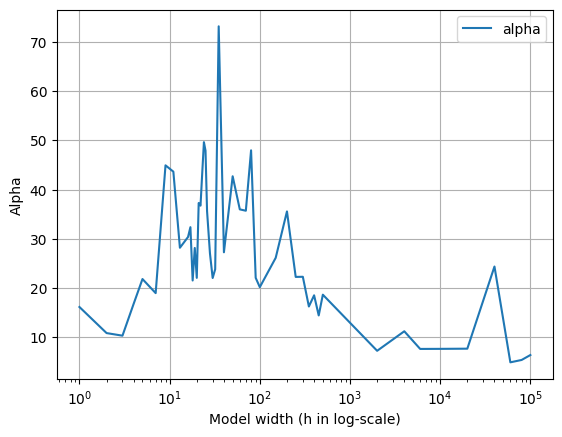

In [183]:
plt.plot(x_width[:len(x_alpha)], np.array(x_alpha), label="alpha")
#plt.plot(x_width[:len(x_alpha)], np.array(x_loss_test)*50, label="Test set")
plt.xscale('log')
plt.xlabel("Model width (h in log-scale)")
plt.ylabel("Alpha")
plt.legend()
plt.grid(True)

## MNIST

In [203]:
config = {
    "General" : {
        "Name" : "Double descent on MNIST",
        "Sub Name" : "0 vs 8 10*10 label noise",
    }
}

In [204]:
experiment_path = r'results/' +  config['General']['Name']
data_path = experiment_path + '/' + config['General']['Sub Name'] + ".json"

In [205]:
with open(data_path, 'r') as file:
    width_to_results = json.load(file)

In [206]:
def unpack_results(width_to_results):
    x_loss_train = []
    x_loss_test = []
    x_complexity = []
    x_alpha = []
    x_parameter_count = []
    x_width = np.sort(np.array(list(width_to_results.keys()), dtype=int))
    
    for width in x_width:
        results = width_to_results[str(width)]
        if len(results["loss train"]) > 0:
            x_loss_train.append(np.mean(results["loss train"]))
            x_loss_test.append(np.median(results["loss test"]))
            x_complexity.append(np.median(np.array(results["complexity"])[:,0]))
            x_alpha.append(np.median(np.array(results["alpha"])))
    return x_loss_train, x_loss_test, x_complexity, x_width, x_alpha

In [207]:
x_loss_train, x_loss_test, x_complexity, x_width, x_alpha = unpack_results(width_to_results)

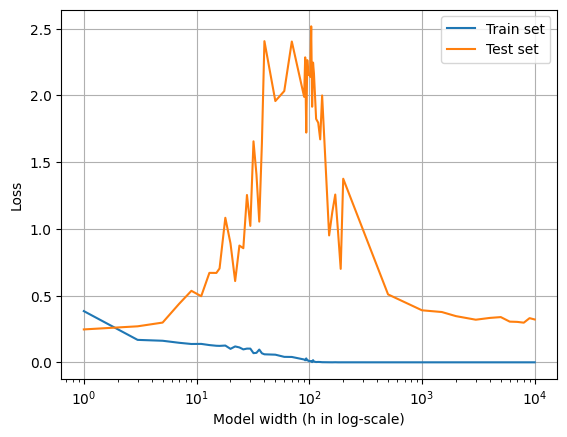

In [208]:
plt.plot(x_width[:len(x_complexity)], np.array(x_loss_train), label="Train set")
plt.plot(x_width[:len(x_complexity)], np.array(x_loss_test), label="Test set")
plt.xscale('log')
plt.xlabel("Model width (h in log-scale)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

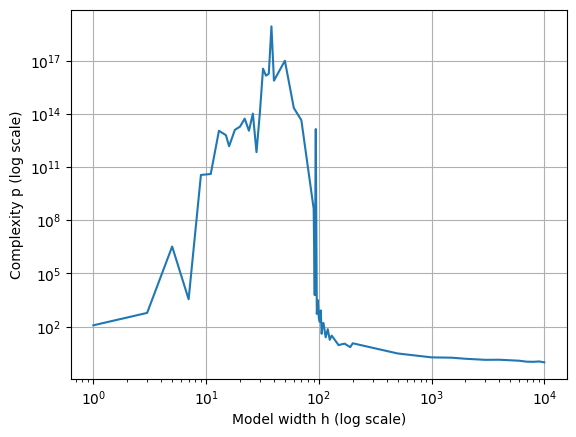

In [210]:
#plt.figure(figsize=(9, 5))
plt.plot(x_width[:len(x_complexity)], x_complexity)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Model width h (log scale)")
plt.ylabel("Complexity p (log scale)")
plt.grid(True)

In [191]:
x_width[24]

90

(0.1, 10000)

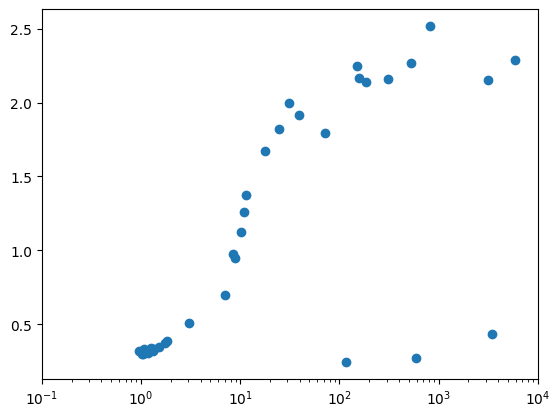

In [216]:
#plt.figure(figsize=(12, 5))
plt.scatter(x_complexity[:], x_loss_test[:])
plt.
plt.xscale('log')
plt.xlim((0.1, 10**4))

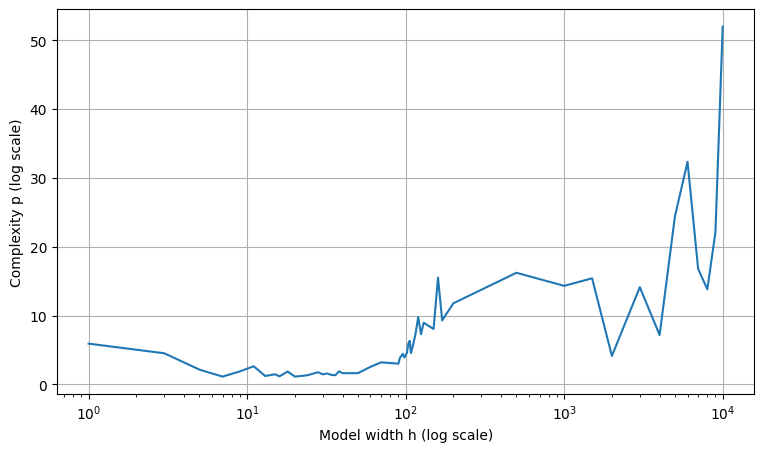

In [175]:
plt.figure(figsize=(9, 5))
plt.plot(x_width[:len(x_alpha)], x_alpha)
plt.xscale('log')
plt.xlabel("Model width h (log scale)")
plt.ylabel("Complexity p (log scale)")
plt.grid(True)